In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# environment constants
rho = 1.225  # kg/m^3, sea level air density
temp_C = 15  # standard sea level temperature
temp_K = 288.2  # standard sea level temperature
pressure = 101325  # Pa, standard sea level pressure
gravity = 9.80665  # m/s^2, acceleration of gravity
speed_of_sound = 340.3  # m/s
dynamic_viscosity = 1.789e-5  # kg/m/s
kinematic_viscosity = 1.460e-5  # m^2/s
gas_constant = 287.1  # J/kg/K
temp_lapse_rate = 0.0065  # K/m, temperature lapse rate
molar_mass = 0.0289652 # kg/mol

In [46]:



AR = 10  # b^2/s
oswald_efficiency = 0.7  # oswald efficiency number, usually between 0.65-0.85 for low speeds M<0.2

max_roll_deg = 0  # phi max
Cd_0 = 0.02  # parasitic drag, zero-lift drag, usually 0.0001-0.05
Cl_max = 1.2  # maximum coefficient of lift
CL_cruise = 0.4  # cruise coefficient of lift
Vel_cruise = 18  # m/s
Vel_stall = 12  # m/s

# mass
airframe_mass_kg = 2.2
deployed_mass_kg = 2.35
autopilot_mass_kg = 0.25
power_train_mass_kg = 0.7
battery_mass_kg = 0.5

# Calculated values
total_mass = airframe_mass_kg+deployed_mass_kg+autopilot_mass_kg+power_train_mass_kg+battery_mass_kg
print(f"Total Mass: {total_mass:.2f} kg")
AUW = total_mass*gravity
print(f"AUW: {AUW:.2f} N")
max_roll_load_factor = 1/np.cos(np.radians(max_roll_deg))
print(f"wing Load Factor at Max Roll: {max_roll_load_factor:.2f}")
q_cruise = (1/2)*rho*Vel_cruise**2
print(f"Dynamic Pressure Cruise: {q_cruise:.2f} N/m^2")
k = 1/(np.pi*AR*oswald_efficiency)
print(f"Oswald efficient factor: {k=:.4f}")
S = (2*AUW)/(rho*Cl_max*Vel_stall**2)
print(f"Wing Area from Stall Speed: {S:.2f} m^2")
WS_stall_kg = total_mass/S
print(f"Wing Load at Stall Speed: {WS_stall_kg:.4f} kg/m^2")


Total Mass: 6.00 kg
AUW: 58.84 N
wing Load Factor at Max Roll: 1.00
Dynamic Pressure Cruise: 198.45 N/m^2
Oswald efficient factor: k=0.0455
Wing Area from Stall Speed: 0.56 m^2
Wing Load at Stall Speed: 10.7927 kg/m^2


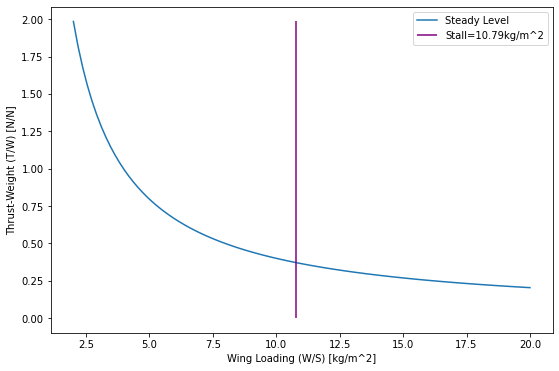

In [54]:
# Straight and level flight
WS = np.linspace(2,20,100)  # kg/m^2
TW_steady_level = (q_cruise*Cd_0)/WS + (k/q_cruise)*WS

fig = plt.figure(figsize=(9,6))
ax = fig.subplots(nrows=1, ncols=1)
ax.plot(WS, TW_steady_level, label="Steady Level")
ax.set_xlabel("Wing Loading (W/S) [kg/m^2]")
ax.set_ylabel("Thrust-Weight (T/W) [N/N]")
ymin=0; ymax=max(TW_steady_level)
ax.vlines(x=WS_stall_kg, ymin=ymin, ymax=ymax, colors='purple', label=f"Stall={WS_stall_kg:.2f}kg/m^2")
ax.legend()

# https://eng.libretexts.org/Bookshelves/Aerospace_Engineering/Aerodynamics_and_Aircraft_Performance_(Marchman)/09%3A_The_Role_of_Performance_in_Aircraft_Design-_Constraint_Analysis

